# QWEN IMAGE torchao | Medium VRAM configuration <br> (~22GB of VRAM)

In [1]:
import torch
from diffusers import AutoModel, DiffusionPipeline, TorchAoConfig

## Model Paths

In [ ]:
Refer to `download_instructions.txt` for the commands to download the weights where to want rather than <br>
installing them into some overly obscure cache locations where huggingface wants to download everything twice. 

In [11]:
# ensure to adjust paths to you local paths

model_id = "/path/to/Qwen/weights/Qwen-Image"  # <- local path
# lora_path = "/path/to/Qwen/Lora/weights/Qwen-Image-Lightning-4steps-V1.0.safetensors"
lora_path = "/path/to/Qwen/Lora/weights/Qwen-Image-Lightning-8steps-V1.1.safetensors"

## Configuration of Weights

In [3]:
torch_dtype = torch.bfloat16
device = "cuda"

quantization_config = TorchAoConfig("int8wo")

# 1) Load quantized transformer
transformer = AutoModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=quantization_config,
    torch_dtype=torch_dtype,
)

# 2) Build pipeline (base model)
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    transformer=transformer,
    torch_dtype=torch_dtype,
)


pipe.enable_model_cpu_offload()

The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Configuration of Lora Weights

In [4]:
pipe.load_lora_weights(lora_path)

## Inference Settings

In [12]:
prompt = (
    "The background: The edge of a cliff where storms thunder and waves massive menacingly tumble. But in the distance "
    "a blue sky tears open before a great light."
    "The text 'ARE YOU EVEN YOU?' is written in LIGHT. "
)
negative_prompt = "SYNDICATE_D"
seed = 42 # The meaning of life.
width = 1664
height = 928
steps = 8 # 4 Steps for 4-Step lora
cfg = 1.0

## Inference

In [13]:
generator = torch.Generator(device="cuda").manual_seed(seed)

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    num_inference_steps=steps,
    true_cfg_scale=cfg,
    generator=generator,
).images[0]

  0%|          | 0/8 [00:00<?, ?it/s]

## Output

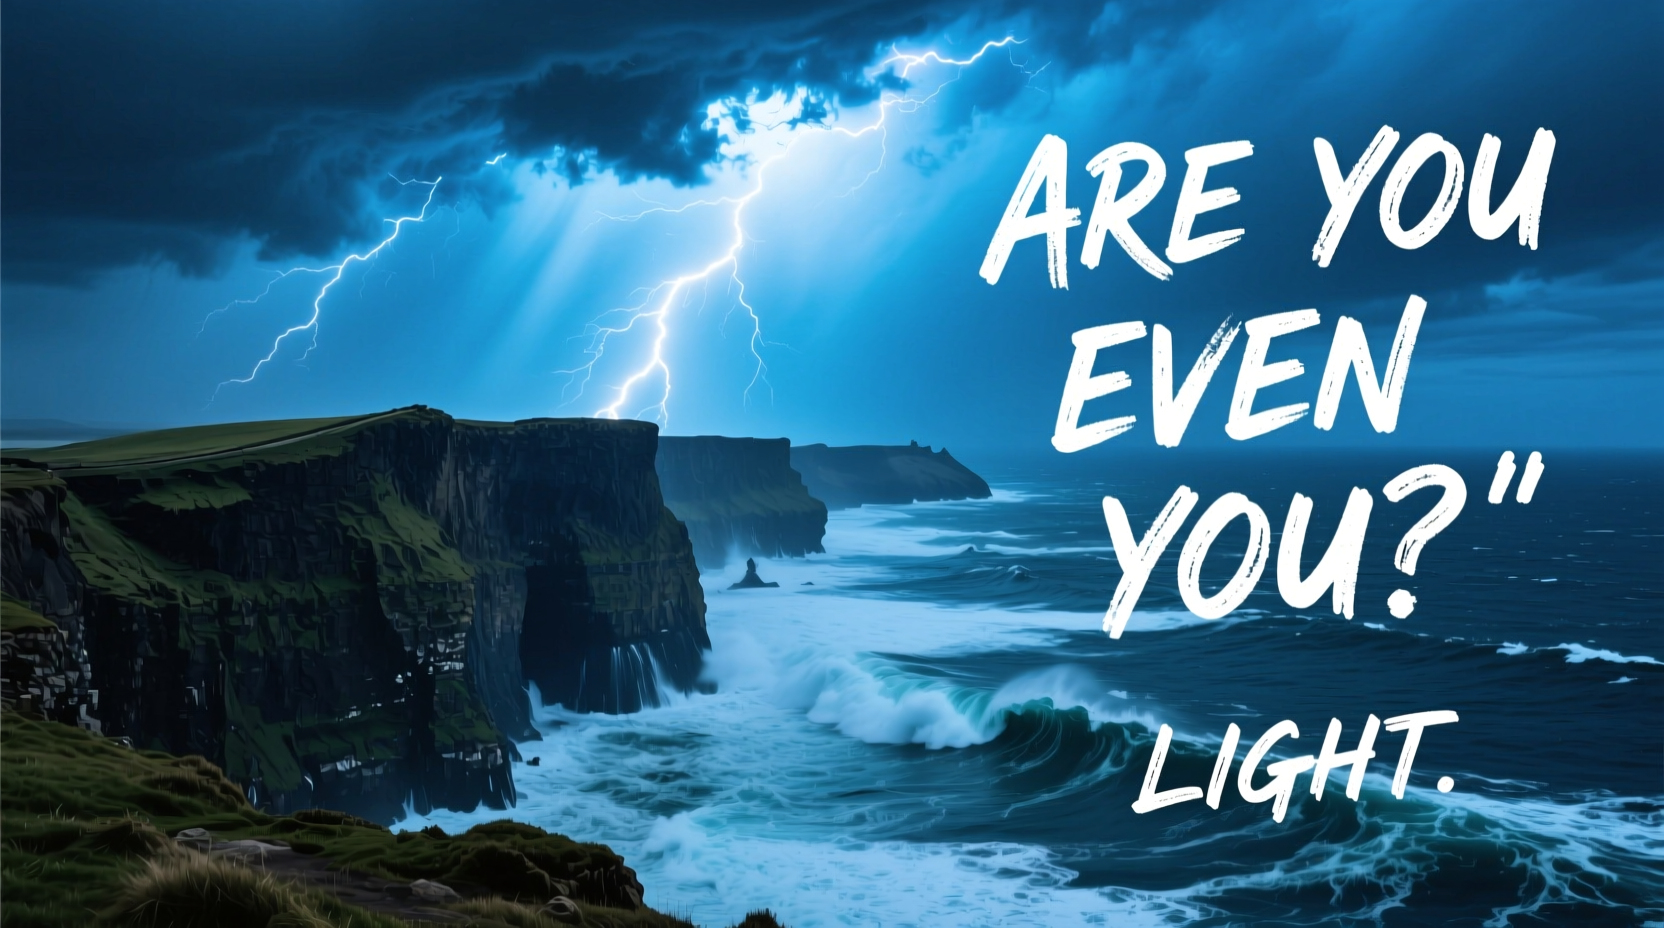

In [14]:
# image.save("qwen_torchao_lora_4step.png")
image